# MM2 Data Analysis - Flagged vs Unflagged

## Imports

In [1]:
import math
import numpy as np
import scipy
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test

from datetime import datetime, timedelta
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

## Parameters

## Input

In [3]:
# read all data (comprehensive files are those that also have records that should be excluded d/t lack of prior
# PCP encounters, with a flag designating them)
crc_df = pd.read_csv('Data/CRC_2016to2020_comprehensive.csv')
lca_df = pd.read_csv('Data/LCa_2016to2020_comprehensive.csv')
cap_df = pd.read_csv('Data/CaP_2016to2020_comprehensive.csv')
pca_df = pd.read_csv('Data/PCa_2016to2020_comprehensive.csv')

In [4]:
# this is to only select patients matching exclusion criteria, as the comprehensive dataset also contains the others
crc_df = crc_df[crc_df['HasPCPAfterCutOff'] == 1]
lca_df = lca_df[lca_df['HasPCPAfterCutOff'] == 1]
cap_df = cap_df[cap_df['HasPCPAfterCutOff'] == 1]
pca_df = pca_df[pca_df['HasPCPAfterCutOff'] == 1]

## Processing

## Descriptive

### EP

Text(0.5, 1.0, 'Incidence of EP of CRC Between 2016-2020')

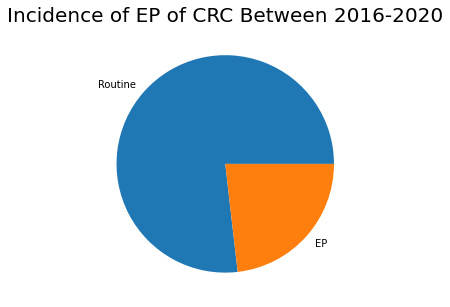

In [5]:
pie_data = [1-crc_df['EP'].mean(), crc_df['EP'].mean()]
pie_labels = ['Routine', 'EP']
plt.pie(pie_data, labels = pie_labels)
plt.title('Incidence of EP of CRC Between 2016-2020', fontsize=20)

Text(0.5, 1.0, 'Incidence of EP of Lung Cancer Between 2016-2020')

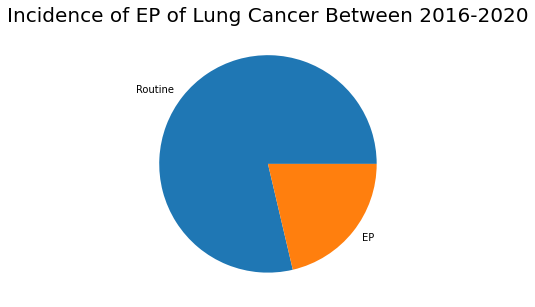

In [6]:
pie_data = [1-lca_df['EP'].mean(), lca_df['EP'].mean()]
pie_labels = ['Routine', 'EP']
plt.pie(pie_data, labels = pie_labels)
plt.title('Incidence of EP of Lung Cancer Between 2016-2020', fontsize=20)

Text(0.5, 1.0, 'Incidence of EP of Prostate Cancer Between 2016-2020')

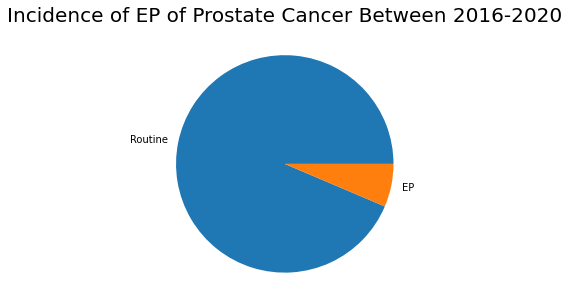

In [7]:
pie_data = [1-cap_df['EP'].mean(), cap_df['EP'].mean()]
pie_labels = ['Routine', 'EP']
plt.pie(pie_data, labels = pie_labels)
plt.title('Incidence of EP of Prostate Cancer Between 2016-2020', fontsize=20)

Text(0.5, 1.0, 'Incidence of EP of Pancreatic Cancer Between 2016-2020')

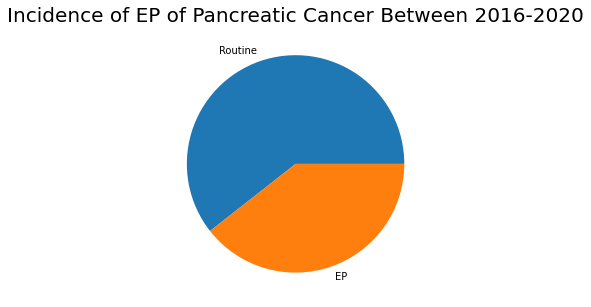

In [8]:
pie_data = [1-pca_df['EP'].mean(), pca_df['EP'].mean()]
pie_labels = ['Routine', 'EP']
plt.pie(pie_data, labels = pie_labels)
plt.title('Incidence of EP of Pancreatic Cancer Between 2016-2020', fontsize=20)

#### CRC

In [9]:
crc_epratio_stats = crc_df['EP'].agg(['mean', 'std', 'count'])

crc_epratio_stats['ci95_hi'] = (crc_epratio_stats['mean'] + 1.96 * crc_epratio_stats['std']/math.sqrt(crc_epratio_stats['count'])) * 100
crc_epratio_stats['ci95_lo'] = (crc_epratio_stats['mean'] - 1.96 * crc_epratio_stats['std']/math.sqrt(crc_epratio_stats['count'])) * 100
crc_epratio_stats['% EP Trigger Positive'] = crc_epratio_stats['mean'] * 100

In [10]:
crc_df[crc_df['EP'] == 1].shape[0]

3401

In [11]:
crc_epratio_stats

mean                         0.231770
std                          0.421978
count                    14674.000000
ci95_hi                     23.859813
ci95_lo                     22.494283
% EP Trigger Positive       23.177048
Name: EP, dtype: float64

#### LCa

In [12]:
lca_epratio_stats = lca_df['EP'].agg(['mean', 'std', 'count'])

lca_epratio_stats['ci95_hi'] = (lca_epratio_stats['mean'] + 1.96 * lca_epratio_stats['std']/math.sqrt(lca_epratio_stats['count'])) * 100
lca_epratio_stats['ci95_lo'] = (lca_epratio_stats['mean'] - 1.96 * lca_epratio_stats['std']/math.sqrt(lca_epratio_stats['count'])) * 100
lca_epratio_stats['% EP Trigger Positive'] = lca_epratio_stats['mean'] * 100

In [13]:
lca_df[lca_df['EP'] == 1].shape[0]

8038

In [14]:
lca_epratio_stats

mean                         0.213260
std                          0.409616
count                    37691.000000
ci95_hi                     21.739582
ci95_lo                     20.912510
% EP Trigger Positive       21.326046
Name: EP, dtype: float64

#### CaP

In [15]:
cap_epratio_stats = cap_df['EP'].agg(['mean', 'std', 'count'])

cap_epratio_stats['ci95_hi'] = (cap_epratio_stats['mean'] + 1.96 * cap_epratio_stats['std']/math.sqrt(cap_epratio_stats['count'])) * 100
cap_epratio_stats['ci95_lo'] = (cap_epratio_stats['mean'] - 1.96 * cap_epratio_stats['std']/math.sqrt(cap_epratio_stats['count'])) * 100
cap_epratio_stats['% EP Trigger Positive'] = cap_epratio_stats['mean'] * 100

In [16]:
cap_df[cap_df['EP'] == 1].shape[0]

3783

In [17]:
cap_epratio_stats

mean                         0.064032
std                          0.244812
count                    59080.000000
ci95_hi                      6.600592
ci95_lo                      6.205773
% EP Trigger Positive        6.403182
Name: EP, dtype: float64

#### PCa

In [18]:
pca_epratio_stats = pca_df['EP'].agg(['mean', 'std', 'count'])

pca_epratio_stats['ci95_hi'] = (pca_epratio_stats['mean'] + 1.96 * pca_epratio_stats['std']/math.sqrt(pca_epratio_stats['count'])) * 100
pca_epratio_stats['ci95_lo'] = (pca_epratio_stats['mean'] - 1.96 * pca_epratio_stats['std']/math.sqrt(pca_epratio_stats['count'])) * 100
pca_epratio_stats['% EP Trigger Positive'] = pca_epratio_stats['mean'] * 100

In [19]:
pca_df[pca_df['EP'] == 1].shape[0]

1991

In [20]:
pca_epratio_stats

mean                        0.394101
std                         0.488705
count                    5052.000000
ci95_hi                    40.757767
ci95_lo                    38.062503
% EP Trigger Positive      39.410135
Name: EP, dtype: float64

### EP by Sta3n

#### CRC

In [21]:
crc_numep_df = crc_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').sum()
crc_numep_df = crc_numep_df.rename(columns={'EP':'num_EPs'})

In [22]:
crc_numdx_df = crc_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').count()
crc_numdx_df = crc_numdx_df.rename(columns={'EP':'tot_dx'})

In [23]:
crc_epratio_df = crc_numep_df.merge(crc_numdx_df,left_on='DiagnosisSta3n',right_on='DiagnosisSta3n')
crc_epratio_df['ratio'] = (crc_epratio_df['num_EPs'] / crc_epratio_df['tot_dx']) * 100
crc_epratio_df['ratio'].describe()

count    117.000000
mean      22.868788
std       11.104877
min        0.000000
25%       18.181818
50%       23.376623
75%       27.619048
max      100.000000
Name: ratio, dtype: float64

In [24]:
crc_epratio_df['ratio'].median()

23.376623376623375

<Figure size 1728x864 with 0 Axes>

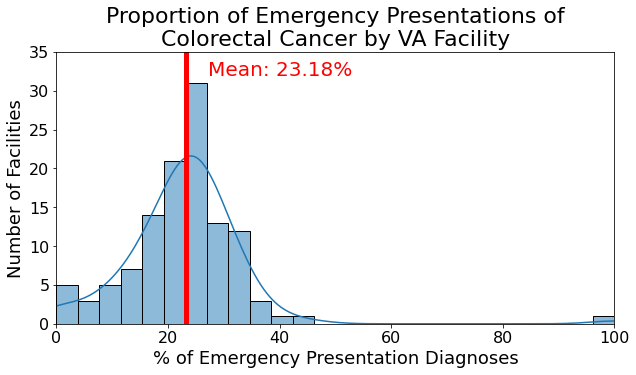

<Figure size 1728x864 with 0 Axes>

In [83]:
crc_hist_plt = sns.histplot(data=crc_epratio_df['ratio'], kde=True)
plt.axvline(crc_epratio_stats['% EP Trigger Positive'], color='r', linewidth=5)
plt.text(crc_epratio_stats['% EP Trigger Positive'] + 4, 32, 'Mean: {:.2f}%'.format(crc_epratio_stats['% EP Trigger Positive']), fontsize=20, color = 'r')

# crc_hist_plt.axes.set_title("Distribution of Emergency Presentation to \nTotal Diagnoses Ratio per Sta3n for CRC 2016-2020", fontsize=20)
plt.title("Proportion of Emergency Presentations of\nColorectal Cancer by VA Facility", fontsize=22)
plt.xlabel ("% of Emergency Presentation Diagnoses", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel ("Number of Facilities", fontsize=18)
plt.yticks(fontsize=16)

plt.ylim ([0, 35])
plt.xlim ([0, 100])
plt.figure(figsize=(24,12))

#### LCa

In [26]:
lca_numep_df = lca_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').sum()
lca_numep_df = lca_numep_df.rename(columns={'EP':'num_EPs'})

In [27]:
lca_numdx_df = lca_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').count()
lca_numdx_df = lca_numdx_df.rename(columns={'EP':'tot_dx'})

In [28]:
lca_epratio_df = lca_numep_df.merge(lca_numdx_df,left_on='DiagnosisSta3n',right_on='DiagnosisSta3n')
lca_epratio_df['ratio'] = (lca_epratio_df['num_EPs'] / lca_epratio_df['tot_dx']) * 100
lca_epratio_df['ratio'].describe()

count    120.000000
mean      21.658974
std        8.663437
min        0.000000
25%       17.331723
50%       21.763654
75%       24.971109
max       66.666667
Name: ratio, dtype: float64

In [29]:
lca_epratio_df['ratio'].median()

21.76365421902148

<Figure size 1728x864 with 0 Axes>

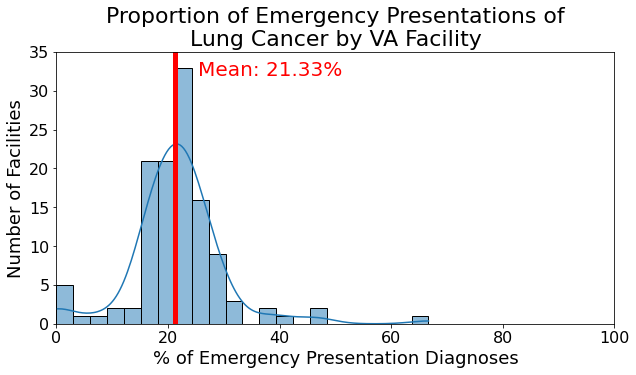

<Figure size 1728x864 with 0 Axes>

In [82]:
lca_hist_plt = sns.histplot(data=lca_epratio_df['ratio'], kde=True)
plt.axvline(lca_epratio_stats['% EP Trigger Positive'], color='r', linewidth=5)
plt.text(lca_epratio_stats['% EP Trigger Positive'] + 4, 32, 'Mean: {:.2f}%'.format(lca_epratio_stats['% EP Trigger Positive']), fontsize=20, color = 'r')

# crc_hist_plt.axes.set_title("Distribution of Emergency Presentation to \nTotal Diagnoses Ratio per Sta3n for CRC 2016-2020", fontsize=20)
plt.title("Proportion of Emergency Presentations of\nLung Cancer by VA Facility", fontsize=22)
plt.xlabel ("% of Emergency Presentation Diagnoses", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel ("Number of Facilities", fontsize=18)
plt.yticks(fontsize=16)

plt.ylim ([0, 35])
plt.xlim ([0, 100])
plt.figure(figsize=(24,12))

#### CaP

In [31]:
cap_numep_df = cap_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').sum()
cap_numep_df = cap_numep_df.rename(columns={'EP':'num_EPs'})

In [32]:
cap_numdx_df = cap_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').count()
cap_numdx_df = cap_numdx_df.rename(columns={'EP':'tot_dx'})

In [33]:
cap_epratio_df = cap_numep_df.merge(cap_numdx_df,left_on='DiagnosisSta3n',right_on='DiagnosisSta3n')
cap_epratio_df['ratio'] = (cap_epratio_df['num_EPs'] / cap_epratio_df['tot_dx']) * 100
cap_epratio_df['ratio'].describe()

count    117.000000
mean       6.926266
std        4.892596
min        0.000000
25%        5.035971
50%        6.410256
75%        8.020050
max       50.000000
Name: ratio, dtype: float64

In [34]:
cap_epratio_df['ratio'].median()

6.41025641025641

<Figure size 1728x864 with 0 Axes>

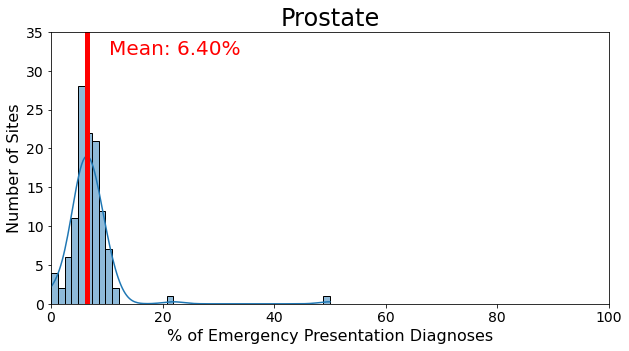

<Figure size 1728x864 with 0 Axes>

In [35]:
cap_hist_plt = sns.histplot(data=cap_epratio_df['ratio'], kde=True)
plt.axvline(cap_epratio_stats['% EP Trigger Positive'], color='r', linewidth=5)
plt.text(cap_epratio_stats['% EP Trigger Positive'] + 4, 32, 'Mean: {:.2f}%'.format(cap_epratio_stats['% EP Trigger Positive']), fontsize=20, color = 'r')

# crc_hist_plt.axes.set_title("Distribution of Emergency Presentation to \nTotal Diagnoses Ratio per Sta3n for CRC 2016-2020", fontsize=20)
plt.title("Prostate", fontsize=24)
plt.xlabel ("% of Emergency Presentation Diagnoses", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel ("Number of Sites", fontsize=16)
plt.yticks(fontsize=14)

plt.ylim ([0, 35])
plt.xlim ([0, 100])
plt.figure(figsize=(24,12))

#### PCa

In [36]:
pca_numep_df = pca_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').sum()
pca_numep_df = pca_numep_df.rename(columns={'EP':'num_EPs'})

In [37]:
pca_numdx_df = pca_df[['DiagnosisSta3n', 'EP']].groupby('DiagnosisSta3n').count()
pca_numdx_df = pca_numdx_df.rename(columns={'EP':'tot_dx'})

In [38]:
pca_epratio_df = pca_numep_df.merge(pca_numdx_df,left_on='DiagnosisSta3n',right_on='DiagnosisSta3n')
pca_epratio_df['ratio'] = (pca_epratio_df['num_EPs'] / pca_epratio_df['tot_dx']) * 100
pca_epratio_df['ratio'].describe()

count    117.000000
mean      36.955755
std       16.573615
min        0.000000
25%       28.358209
50%       38.235294
75%       45.783133
max      100.000000
Name: ratio, dtype: float64

In [39]:
pca_epratio_df['ratio'].median()

38.23529411764706

<Figure size 1728x864 with 0 Axes>

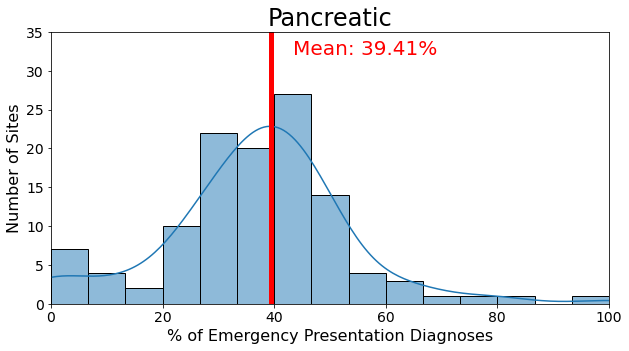

<Figure size 1728x864 with 0 Axes>

In [40]:
pca_hist_plt = sns.histplot(data=pca_epratio_df['ratio'], kde=True)
plt.axvline(pca_epratio_stats['% EP Trigger Positive'], color='r', linewidth=5)
plt.text(pca_epratio_stats['% EP Trigger Positive'] + 4, 32, 'Mean: {:.2f}%'.format(pca_epratio_stats['% EP Trigger Positive']), fontsize=20, color = 'r')

# crc_hist_plt.axes.set_title("Distribution of Emergency Presentation to \nTotal Diagnoses Ratio per Sta3n for CRC 2016-2020", fontsize=20)
plt.title("Pancreatic", fontsize=24)
plt.xlabel ("% of Emergency Presentation Diagnoses", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel ("Number of Sites", fontsize=16)
plt.yticks(fontsize=14)

plt.ylim ([0, 35])
plt.xlim ([0, 100])
plt.figure(figsize=(24,12))

### Stage

Text(0, 0.5, 'Count')

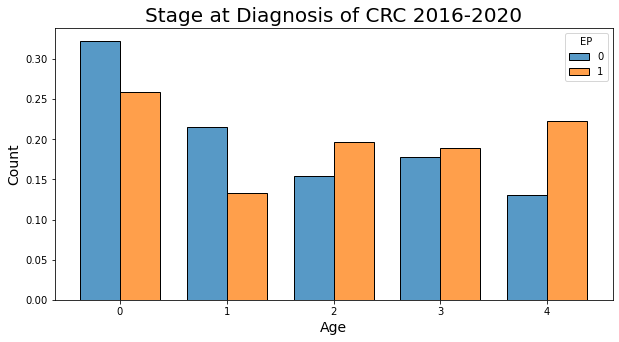

In [41]:
crc_stage_plt = sns.histplot(data=crc_df, x='StageOfCancer', hue='EP', stat='density', common_norm=False, discrete=True, multiple='dodge', shrink=0.75)
crc_stage_plt.axes.set_title("Stage at Diagnosis of CRC 2016-2020", fontsize=20)
crc_stage_plt.axes.set_xlabel ("Age", fontsize=14)
crc_stage_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

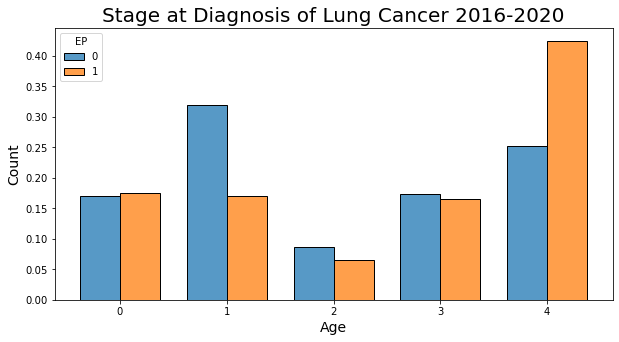

In [42]:
lca_stage_plt = sns.histplot(data=lca_df, x='StageOfCancer', hue='EP', stat='density', common_norm=False, discrete=True, multiple='dodge', shrink=0.75)
lca_stage_plt.axes.set_title("Stage at Diagnosis of Lung Cancer 2016-2020", fontsize=20)
lca_stage_plt.axes.set_xlabel ("Age", fontsize=14)
lca_stage_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

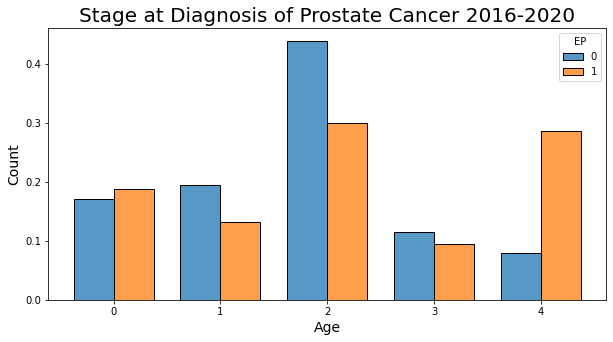

In [43]:
cap_stage_plt = sns.histplot(data=cap_df, x='StageOfCancer', hue='EP', stat='density', common_norm=False, discrete=True, multiple='dodge', shrink=0.75)
cap_stage_plt.axes.set_title("Stage at Diagnosis of Prostate Cancer 2016-2020", fontsize=20)
cap_stage_plt.axes.set_xlabel ("Age", fontsize=14)
cap_stage_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

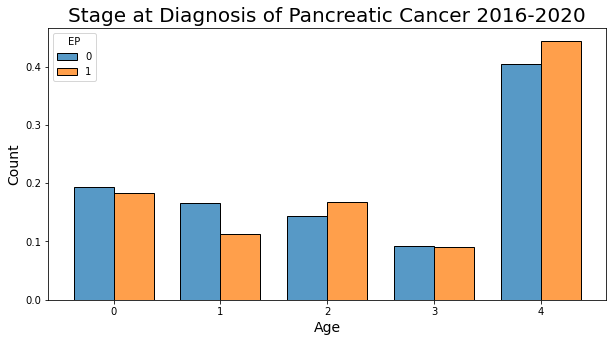

In [44]:
pca_stage_plt = sns.histplot(data=pca_df, x='StageOfCancer', hue='EP', stat='density', common_norm=False, discrete=True, multiple='dodge', shrink=0.75)
pca_stage_plt.axes.set_title("Stage at Diagnosis of Pancreatic Cancer 2016-2020", fontsize=20)
pca_stage_plt.axes.set_xlabel ("Age", fontsize=14)
pca_stage_plt.axes.set_ylabel ("Count", fontsize=14)

### Age

Text(0, 0.5, 'Count')

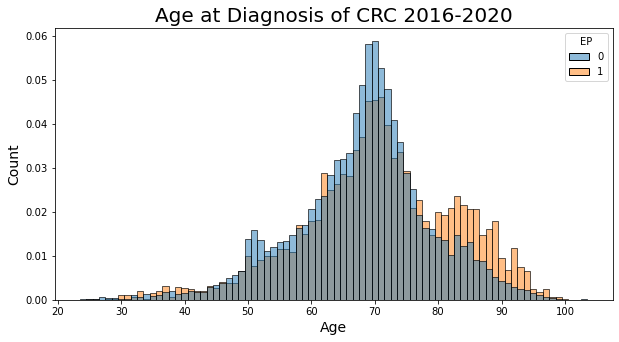

In [45]:
crc_age_plt = sns.histplot(data=crc_df, x='PatientAge', hue='EP', stat='density', common_norm=False, discrete=True)
crc_age_plt.axes.set_title("Age at Diagnosis of CRC 2016-2020", fontsize=20)
crc_age_plt.axes.set_xlabel ("Age", fontsize=14)
crc_age_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

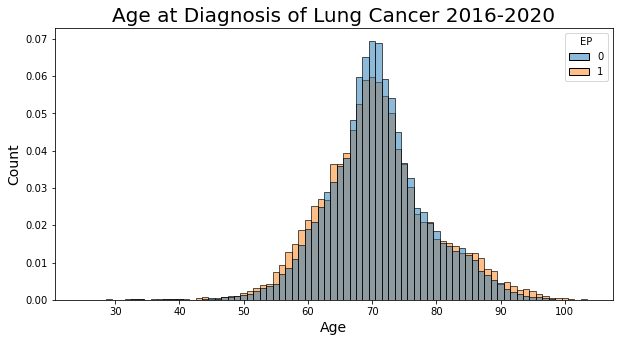

In [46]:
lca_age_plt = sns.histplot(data=lca_df, x='PatientAge', hue='EP', stat='density', common_norm=False, discrete=True)
lca_age_plt.axes.set_title("Age at Diagnosis of Lung Cancer 2016-2020", fontsize=20)
lca_age_plt.axes.set_xlabel ("Age", fontsize=14)
lca_age_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

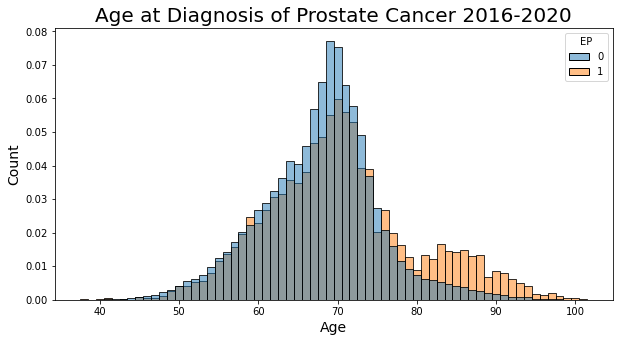

In [47]:
cap_age_plt = sns.histplot(data=cap_df, x='PatientAge', hue='EP', stat='density', common_norm=False, discrete=True)
cap_age_plt.axes.set_title("Age at Diagnosis of Prostate Cancer 2016-2020", fontsize=20)
cap_age_plt.axes.set_xlabel ("Age", fontsize=14)
cap_age_plt.axes.set_ylabel ("Count", fontsize=14)

Text(0, 0.5, 'Count')

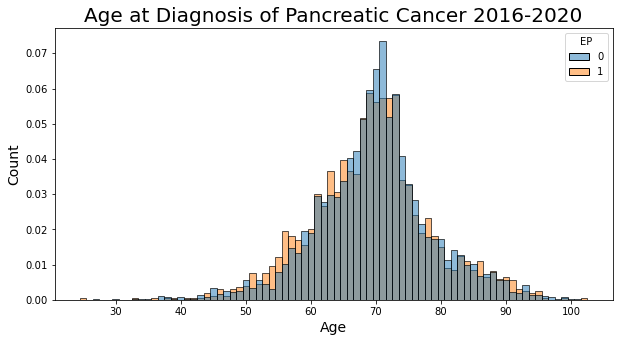

In [48]:
pca_age_plt = sns.histplot(data=pca_df, x='PatientAge', hue='EP', stat='density', common_norm=False, discrete=True)
pca_age_plt.axes.set_title("Age at Diagnosis of Pancreatic Cancer 2016-2020", fontsize=20)
pca_age_plt.axes.set_xlabel ("Age", fontsize=14)
pca_age_plt.axes.set_ylabel ("Count", fontsize=14)

### Sex

### Race

Text(0, 0.5, 'Proportion')

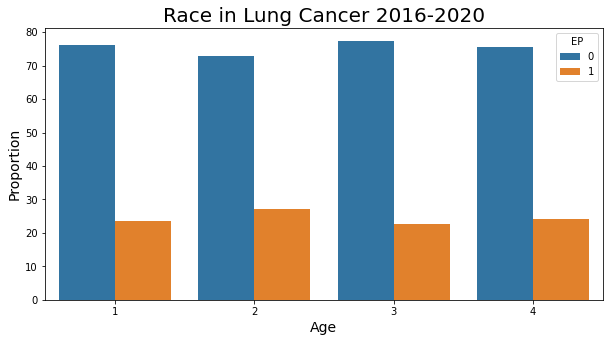

In [49]:
crc_rhist_df = crc_df.groupby('PatientRace')['EP'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()
crc_age_plt = sns.barplot(data=crc_rhist_df, x='PatientRace', y = 'Proportion', hue='EP')
crc_age_plt.axes.set_title("Race in Lung Cancer 2016-2020", fontsize=20)
crc_age_plt.axes.set_xlabel ("Age", fontsize=14)
crc_age_plt.axes.set_ylabel ("Proportion", fontsize=14)

Text(0, 0.5, 'Proportion')

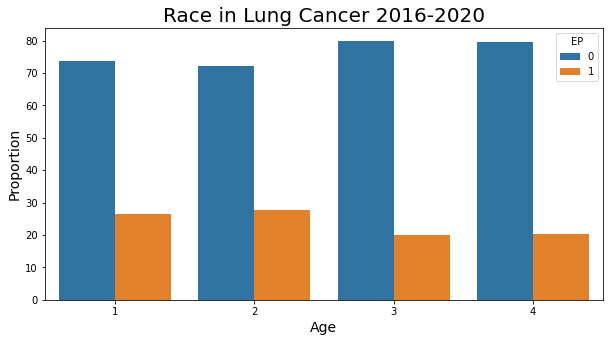

In [50]:
lca_rhist_df = lca_df.groupby('PatientRace')['EP'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()
lca_age_plt = sns.barplot(data=lca_rhist_df, x='PatientRace', y = 'Proportion', hue='EP')
lca_age_plt.axes.set_title("Race in Lung Cancer 2016-2020", fontsize=20)
lca_age_plt.axes.set_xlabel ("Age", fontsize=14)
lca_age_plt.axes.set_ylabel ("Proportion", fontsize=14)

Text(0, 0.5, 'Proportion')

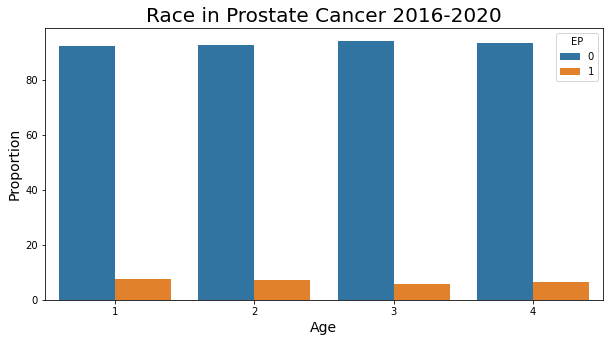

In [51]:
cap_rhist_df = cap_df.groupby('PatientRace')['EP'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()
cap_age_plt = sns.barplot(data=cap_rhist_df, x='PatientRace', y = 'Proportion', hue='EP')
cap_age_plt.axes.set_title("Race in Prostate Cancer 2016-2020", fontsize=20)
cap_age_plt.axes.set_xlabel ("Age", fontsize=14)
cap_age_plt.axes.set_ylabel ("Proportion", fontsize=14)

Text(0, 0.5, 'Proportion')

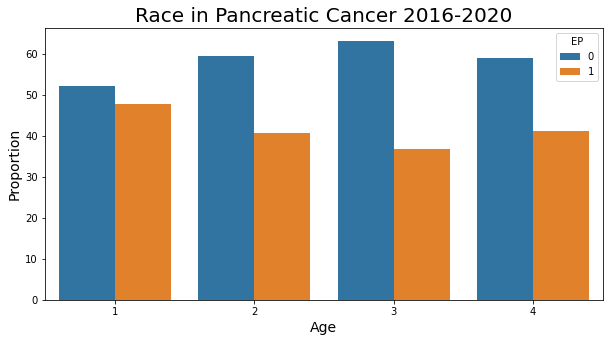

In [52]:
pca_rhist_df = pca_df.groupby('PatientRace')['EP'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()
pca_age_plt = sns.barplot(data=pca_rhist_df, x='PatientRace', y = 'Proportion', hue='EP')
pca_age_plt.axes.set_title("Race in Pancreatic Cancer 2016-2020", fontsize=20)
pca_age_plt.axes.set_xlabel ("Age", fontsize=14)
pca_age_plt.axes.set_ylabel ("Proportion", fontsize=14)

## EP Associations

In [53]:
crc_df_trimmed.columns

NameError: name 'crc_df_trimmed' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
reg_crc = LogisticRegression(penalty='none')

reg_crc.fit(crc_df_trimmed[['PatientSex', 'PatientAge', 'IsNHB', 'IsHispanic', 'IsOtherRace']], crc_df_trimmed['EP'])

print(np.exp(reg_crc.coef_))

In [ ]:
import statsmodels.api as sm

## Mortality

In [57]:
# select only columns we need
crc_df_trimmed = crc_df[['Time365', 'DeathStatus365', 'EP', 'PatientRace', 'PatientSex', 'PatientAge', 'StageOfCancer']].copy()
lca_df_trimmed = lca_df[['Time365', 'DeathStatus365', 'EP', 'PatientRace', 'PatientSex', 'PatientAge', 'StageOfCancer']].copy()
pca_df_trimmed = pca_df[['Time365', 'DeathStatus365', 'EP', 'PatientRace', 'PatientSex', 'PatientAge', 'StageOfCancer']].copy()
cap_df_trimmed = cap_df[['Time365', 'DeathStatus365', 'EP', 'PatientRace', 'PatientSex', 'PatientAge', 'StageOfCancer']].copy()

In [58]:
# encode race as seperate columns for regression since categorical
crc_df_trimmed['IsNHB'] = crc_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 1 else 0, axis=1)
crc_df_trimmed['IsHispanic'] = crc_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 2 else 0, axis=1)
crc_df_trimmed['IsNHW'] = crc_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 3 else 0, axis=1)
crc_df_trimmed['IsOtherRace'] = crc_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 4 else 0, axis=1)
crc_df_trimmed = crc_df_trimmed.drop('PatientRace', axis=1)

lca_df_trimmed['IsNHB'] = lca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 1 else 0, axis=1)
lca_df_trimmed['IsHispanic'] = lca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 2 else 0, axis=1)
lca_df_trimmed['IsNHW'] = lca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 3 else 0, axis=1)
lca_df_trimmed['IsOtherRace'] = lca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 4 else 0, axis=1)
lca_df_trimmed = lca_df_trimmed.drop('PatientRace', axis=1)

cap_df_trimmed['IsNHB'] = cap_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 1 else 0, axis=1)
cap_df_trimmed['IsHispanic'] = cap_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 2 else 0, axis=1)
cap_df_trimmed['IsNHW'] = cap_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 3 else 0, axis=1)
cap_df_trimmed['IsOtherRace'] = cap_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 4 else 0, axis=1)
cap_df_trimmed = cap_df_trimmed.drop('PatientRace', axis=1)

pca_df_trimmed['IsNHB'] = pca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 1 else 0, axis=1)
pca_df_trimmed['IsHispanic'] = pca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 2 else 0, axis=1)
pca_df_trimmed['IsNHW'] = pca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 3 else 0, axis=1)
pca_df_trimmed['IsOtherRace'] = pca_df_trimmed.apply(lambda row : 1 if row['PatientRace'] == 4 else 0, axis=1)
pca_df_trimmed = pca_df_trimmed.drop('PatientRace', axis=1)

In [59]:
# split the data into EP and non-EP groups for each cancer to make things easier
crc_df_ep = crc_df_trimmed[crc_df_trimmed['EP'] == 1].drop('EP', axis=1)
crc_df_rt = crc_df_trimmed[crc_df_trimmed['EP'] == 0].drop('EP', axis=1)

lca_df_ep = lca_df_trimmed[lca_df_trimmed['EP'] == 1].drop('EP', axis=1)
lca_df_rt = lca_df_trimmed[lca_df_trimmed['EP'] == 0].drop('EP', axis=1)

cap_df_ep = cap_df_trimmed[cap_df_trimmed['EP'] == 1].drop('EP', axis=1)
cap_df_rt = cap_df_trimmed[cap_df_trimmed['EP'] == 0].drop('EP', axis=1)

pca_df_ep = pca_df_trimmed[pca_df_trimmed['EP'] == 1].drop('EP', axis=1)
pca_df_rt = pca_df_trimmed[pca_df_trimmed['EP'] == 0].drop('EP', axis=1)

In [60]:
# fit the data to a Kaplan Meier model
kmf_crc_ep = KaplanMeierFitter()
kmf_crc_rt = KaplanMeierFitter()
kmf_lca_ep = KaplanMeierFitter()
kmf_lca_rt = KaplanMeierFitter()
kmf_cap_ep = KaplanMeierFitter()
kmf_cap_rt = KaplanMeierFitter()
kmf_pca_ep = KaplanMeierFitter()
kmf_pca_rt = KaplanMeierFitter()

kmf_crc_ep.fit(durations = crc_df_ep['Time365'], event_observed=crc_df_ep['DeathStatus365'], label='EP')
kmf_crc_rt.fit(durations = crc_df_rt['Time365'], event_observed=crc_df_rt['DeathStatus365'], label='Routine')

kmf_lca_ep.fit(durations = lca_df_ep['Time365'], event_observed=lca_df_ep['DeathStatus365'], label='EP')
kmf_lca_rt.fit(durations = lca_df_rt['Time365'], event_observed=lca_df_rt['DeathStatus365'], label='Routine')

kmf_cap_ep.fit(durations = cap_df_ep['Time365'], event_observed=cap_df_ep['DeathStatus365'], label='EP')
kmf_cap_rt.fit(durations = cap_df_rt['Time365'], event_observed=cap_df_rt['DeathStatus365'], label='Routine')

kmf_pca_ep.fit(durations = pca_df_ep['Time365'], event_observed=pca_df_ep['DeathStatus365'], label='EP')
kmf_pca_rt.fit(durations = pca_df_rt['Time365'], event_observed=pca_df_rt['DeathStatus365'], label='Routine')

<lifelines.KaplanMeierFitter:"Routine", fitted with 3061 total observations, 1279 right-censored observations>

#### CRC

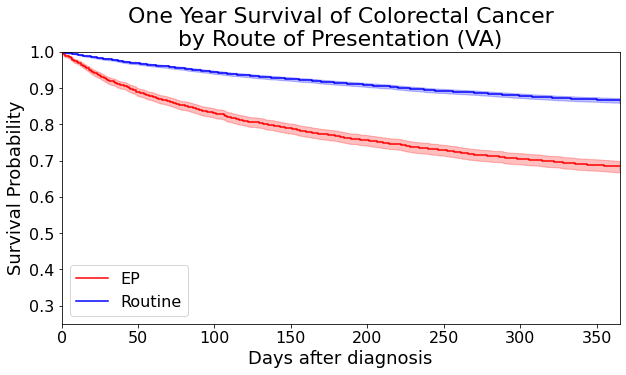

<Figure size 1872x1080 with 0 Axes>

In [91]:
# plot km curves
fig, ax = plt.subplots(figsize=(10,5))

kmf_crc_ep.plot(color='r')
kmf_crc_rt.plot(color='b')

# plt.title("1-Year Mortality of CRC by Route of Presentation (2016-2020)", fontsize=24)
plt.title("One Year Survival of Colorectal Cancer\nby Route of Presentation (VA)", fontsize=22)
plt.xlabel ("Days after diagnosis", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel ("Survival Probability", fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.xlim([0,365])
plt.ylim([0.25, 1.00])
plt.figure(figsize=(26,15))
plt.show()

In [62]:
# assess significance
logrank_crc = logrank_test(durations_A = crc_df_ep['Time365'], durations_B = crc_df_rt['Time365'], event_observed_A = crc_df_ep['DeathStatus365'], event_observed_B = crc_df_rt['DeathStatus365'])
logrank_crc.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         656.97 <0.005    478.91

#### Lung Cancer

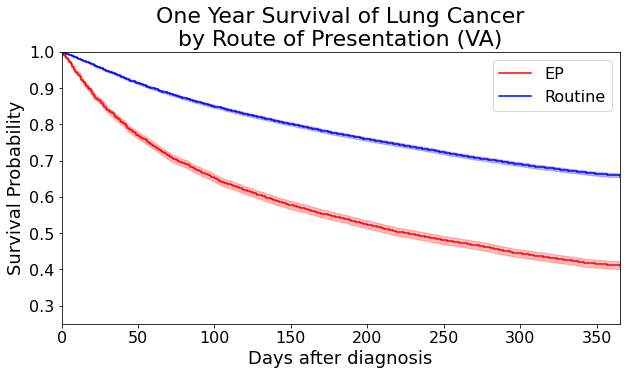

<Figure size 1872x1080 with 0 Axes>

In [93]:
# plot km curves
fig, ax = plt.subplots(figsize=(10,5))

kmf_lca_ep.plot(color='r')
kmf_lca_rt.plot(color='b')

#plt.title("1-Year Mortality of Lung Cancer by Route of Presentation (2016-2020)", fontsize=20)
plt.title("One Year Survival of Lung Cancer\nby Route of Presentation (VA)", fontsize=22)
plt.xlabel ("Days after diagnosis", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel ("Survival Probability", fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.xlim([0,365])
plt.ylim([0.25, 1.00])
plt.figure(figsize=(26,15))
plt.show()

In [64]:
# assess signiicance 
logrank_lca = logrank_test(durations_A = lca_df_ep['Time365'], durations_B = lca_df_rt['Time365'], event_observed_A = lca_df_ep['DeathStatus365'], event_observed_B = lca_df_rt['DeathStatus365'])
logrank_lca.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2166.50 <0.005       inf

#### Prostate Cancer

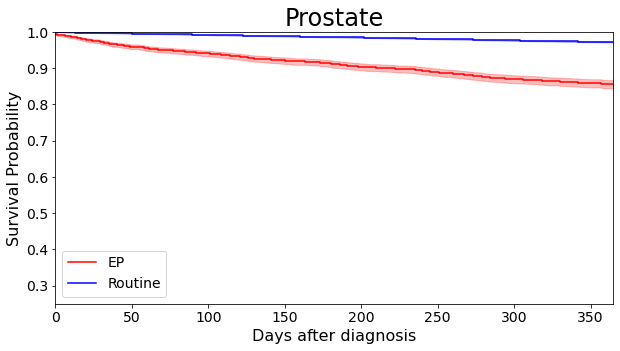

<Figure size 1872x1080 with 0 Axes>

In [65]:
# plot km curves
fig, ax = plt.subplots(figsize=(10,5))

kmf_cap_ep.plot(color='r')
kmf_cap_rt.plot(color='b')

# plt.title("1-Year Mortality of Prostate Cancer by Route of Presentation (2016-2020)", fontsize=20)
plt.title("Prostate", fontsize=24)
plt.xlabel ("Days after diagnosis", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel ("Survival Probability", fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlim([0,365])
plt.ylim([0.25, 1.00])
plt.figure(figsize=(26,15))
plt.show()

In [66]:
# assess signiicance 
logrank_cap = logrank_test(durations_A = cap_df_ep['Time365'], durations_B = cap_df_rt['Time365'], event_observed_A = cap_df_ep['DeathStatus365'], event_observed_B = cap_df_rt['DeathStatus365'])
logrank_cap.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1516.07 <0.005       inf

#### Pancreatic Cancer

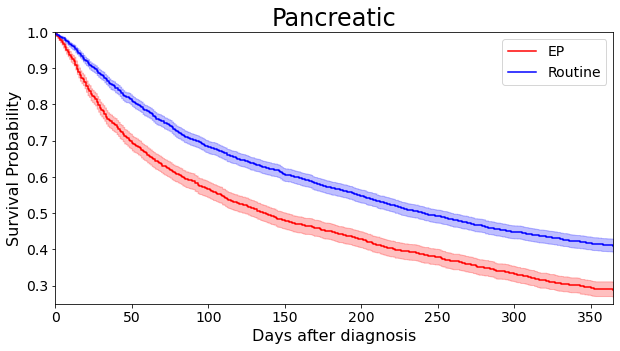

<Figure size 1872x1080 with 0 Axes>

In [67]:
# plot km curves
fig, ax = plt.subplots(figsize=(10,5))

kmf_pca_ep.plot(color='r')
kmf_pca_rt.plot(color='b')

#plt.title("1-Year Mortality of Pancreatic Cancer by Route of Presentation (2016-2020)", fontsize=20)
plt.title("Pancreatic", fontsize=24)
plt.xlabel ("Days after diagnosis", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel ("Survival Probability", fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.xlim([0,365])
plt.ylim([0.25, 1.00])
plt.figure(figsize=(26,15))
plt.show()

In [68]:
# assess signiicance 
logrank_pca = logrank_test(durations_A = pca_df_ep['Time365'], durations_B = pca_df_rt['Time365'], event_observed_A = pca_df_ep['DeathStatus365'], event_observed_B = pca_df_rt['DeathStatus365'])
logrank_pca.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         102.06 <0.005     77.30

## Mortality Associations

In [69]:
cph_crc = CoxPHFitter()
cph_lca = CoxPHFitter()
cph_cap = CoxPHFitter()
cph_pca = CoxPHFitter()
# only rows where we have cancer stage
crc_df_cox = crc_df_trimmed[crc_df_trimmed['StageOfCancer']!=0]
lca_df_cox = lca_df_trimmed[lca_df_trimmed['StageOfCancer']!=0]
cap_df_cox = cap_df_trimmed[cap_df_trimmed['StageOfCancer']!=0]
pca_df_cox = pca_df_trimmed[pca_df_trimmed['StageOfCancer']!=0]
# drop 1 of the dummy vars for cat value col
crc_df_cox = crc_df_cox.drop(['IsNHW'], axis=1)
lca_df_cox = lca_df_cox.drop(['IsNHW'], axis=1)
cap_df_cox = cap_df_cox.drop(['IsNHW', 'PatientSex'], axis=1)
pca_df_cox = pca_df_cox.drop(['IsNHW'], axis=1)

In [70]:
#rename columns
crc_df_cox = crc_df_cox.rename({'IsNHB': 'Race/Ethnicity: Non-Hispanic Black', 'IsHispanic': 'Race/Ethnicity: Hispanic', 'IsOtherRace': 'Race/Ethnicity: Other', 'PatientSex': 'Sex: Male', 'StageOfCancer': 'Cancer Stage', 'PatientAge': 'Age at Diagnosis', 'EP': 'Emergency Presentation'}, axis=1)
lca_df_cox = lca_df_cox.rename({'IsNHB': 'Race/Ethnicity: Non-Hispanic Black', 'IsHispanic': 'Race/Ethnicity: Hispanic', 'IsOtherRace': 'Race/Ethnicity: Other', 'PatientSex': 'Sex: Male', 'StageOfCancer': 'Cancer Stage', 'PatientAge': 'Age at Diagnosis', 'EP': 'Emergency Presentation'}, axis=1)
cap_df_cox = cap_df_cox.rename({'IsNHB': 'Race/Ethnicity: Non-Hispanic Black', 'IsHispanic': 'Race/Ethnicity: Hispanic', 'IsOtherRace': 'Race/Ethnicity: Other', 'PatientSex': 'Sex: Male', 'StageOfCancer': 'Cancer Stage', 'PatientAge': 'Age at Diagnosis', 'EP': 'Emergency Presentation'}, axis=1)
pca_df_cox = pca_df_cox.rename({'IsNHB': 'Race/Ethnicity: Non-Hispanic Black', 'IsHispanic': 'Race/Ethnicity: Hispanic', 'IsOtherRace': 'Race/Ethnicity: Other', 'PatientSex': 'Sex: Male', 'StageOfCancer': 'Cancer Stage', 'PatientAge': 'Age at Diagnosis', 'EP': 'Emergency Presentation'}, axis=1)

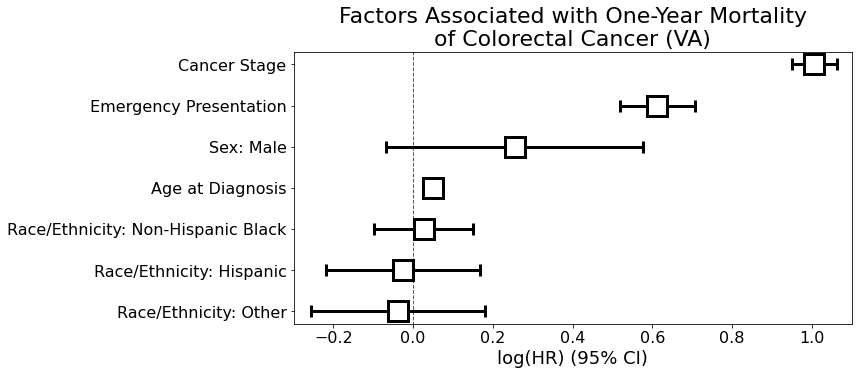

<Figure size 1080x288 with 0 Axes>

In [98]:
cph_crc.fit(crc_df_cox, duration_col='Time365', event_col='DeathStatus365')
cph_crc.plot(markersize=20, elinewidth=3, markeredgewidth=3, capsize=6)

plt.title("Factors Associated with One-Year Mortality\nof Colorectal Cancer (VA)", fontsize=22)
plt.xticks(fontsize=16)
plt.xlabel ('log(HR) (95% CI)', fontsize=18)
plt.yticks(fontsize=16)

plt.xlim([-0.3, 1.1])
plt.figure(figsize=(15,4))
plt.show()

In [72]:
cph_crc.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Emergency Presentation,0.612882,1.845743,0.048429,0.517962,0.707802,1.678604,2.029525,12.655180,1.047357e-36,119.522658
Sex: Male,0.254687,1.290058,0.164857,-0.068427,0.577801,0.933862,1.782115,1.544897,1.223711e-01,3.030665
Age at Diagnosis,0.048740,1.049947,0.002322,0.044189,0.053290,1.045180,1.054736,20.991980,7.764278e-98,322.592102
Cancer Stage,1.006286,2.735422,0.028586,0.950259,1.062313,2.586378,2.893055,35.202205,1.850083e-271,899.354924
Race/Ethnicity: Non-Hispanic Black,0.027155,1.027527,0.063354,-0.097016,0.151326,0.907541,1.163376,0.428626,6.681956e-01,0.581658
Race/Ethnicity: Hispanic,-0.025535,0.974789,0.098781,-0.219142,0.168073,0.803208,1.183022,-0.258497,7.960233e-01,0.329117
Race/Ethnicity: Other,-0.038888,0.961858,0.111516,-0.257456,0.179680,0.773015,1.196834,-0.348724,7.272966e-01,0.459384


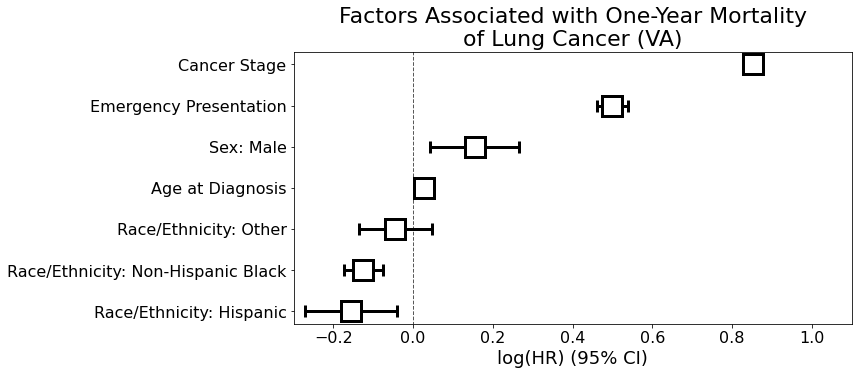

<Figure size 1080x288 with 0 Axes>

In [97]:
## cph_lca.fit(lca_df_cox, duration_col='Time365', event_col='DeathStatus365')
cph_lca.plot(markersize=20, elinewidth=3, markeredgewidth=3, capsize=6)

plt.title("Factors Associated with One-Year Mortality\nof Lung Cancer (VA)", fontsize=22)
plt.xticks(fontsize=16)
plt.xlabel ('log(HR) (95% CI)', fontsize=18)
plt.yticks(fontsize=16)

plt.xlim([-0.3, 1.1])
plt.figure(figsize=(15,4))
plt.show()

In [74]:
cph_lca.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Emergency Presentation,0.499781,1.648361,0.019791,0.460992,0.538571,1.585646,1.713556,25.253092,1.047362e-140,465.003173
Sex: Male,0.154127,1.166639,0.057021,0.042367,0.265886,1.043278,1.304586,2.702975,6.872186e-03,7.185015
Age at Diagnosis,0.026729,1.027090,0.001126,0.024522,0.028936,1.024826,1.029359,23.739434,1.412700e-124,411.420629
Cancer Stage,0.851877,2.344044,0.010063,0.832154,0.871601,2.298264,2.390735,84.653660,0.000000e+00,inf
Race/Ethnicity: Non-Hispanic Black,-0.124941,0.882549,0.025237,-0.174404,-0.075479,0.839957,0.927299,-4.950813,7.390414e-07,20.367842
Race/Ethnicity: Hispanic,-0.156612,0.855036,0.058712,-0.271685,-0.041539,0.762095,0.959312,-2.667476,7.642342e-03,7.031770
Race/Ethnicity: Other,-0.044770,0.956218,0.046387,-0.135686,0.046147,0.873117,1.047228,-0.965133,3.344781e-01,1.580016


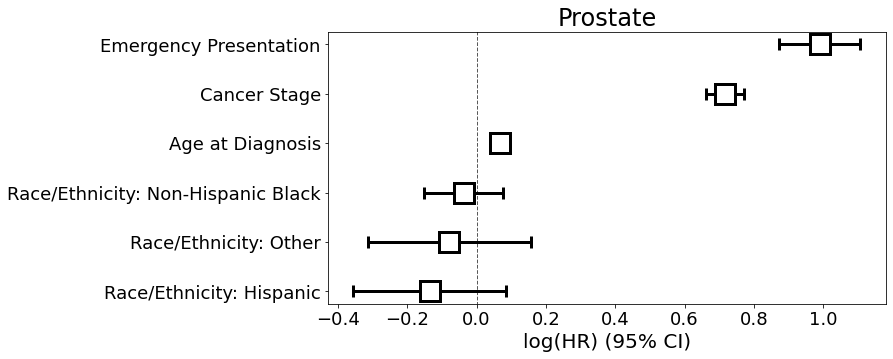

<Figure size 1080x288 with 0 Axes>

In [75]:
cph_cap.fit(cap_df_cox, duration_col='Time365', event_col='DeathStatus365')
cph_cap.plot(markersize=20, elinewidth=3, markeredgewidth=3, capsize=6)

plt.title("Prostate", fontsize=24)
plt.xticks(fontsize=18)
plt.xlabel ('log(HR) (95% CI)', fontsize=20)
plt.yticks(fontsize=18)

plt.figure(figsize=(15,4))
plt.show()

In [76]:
cph_cap.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Emergency Presentation,0.990464,2.692484,0.059753,0.873351,1.107577,2.394923,3.027016,16.576044,1.038438e-61,202.583198
Age at Diagnosis,0.067847,1.070201,0.002982,0.062002,0.073692,1.063964,1.076475,22.750293,1.425470e-114,378.188365
Cancer Stage,0.715913,2.046054,0.027879,0.661271,0.770555,1.937254,2.160965,25.679404,1.985646e-145,480.689965
Race/Ethnicity: Non-Hispanic Black,-0.038080,0.962636,0.058678,-0.153086,0.076926,0.858056,1.079962,-0.648972,5.163562e-01,0.953561
Race/Ethnicity: Hispanic,-0.135551,0.873234,0.112716,-0.356471,0.085368,0.700143,1.089118,-1.202590,2.291350e-01,2.125731
Race/Ethnicity: Other,-0.079657,0.923433,0.120147,-0.315141,0.155827,0.729686,1.168624,-0.662995,5.073336e-01,0.978993


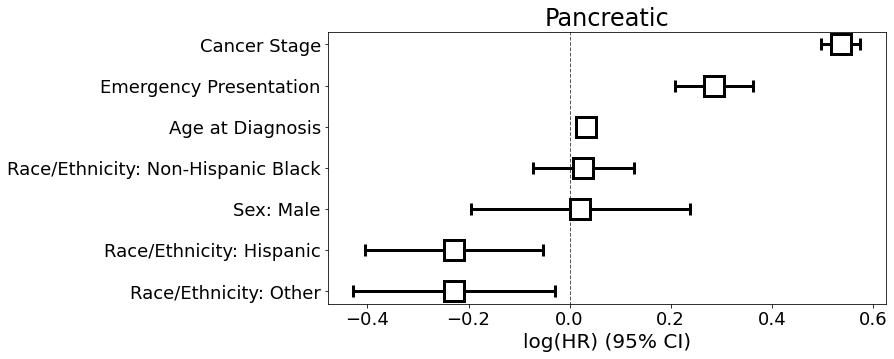

<Figure size 1080x288 with 0 Axes>

In [77]:
cph_pca.fit(pca_df_cox, duration_col='Time365', event_col='DeathStatus365')
cph_pca.plot(markersize=20, elinewidth=3, markeredgewidth=3, capsize=6)

plt.title("Pancreatic", fontsize=24)
plt.xticks(fontsize=18)
plt.xlabel ('log(HR) (95% CI)', fontsize=20)
plt.yticks(fontsize=18)

plt.figure(figsize=(15,4))
plt.show()

In [78]:
cph_pca.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Emergency Presentation,0.285881,1.330933,0.039669,0.208131,0.363631,1.231374,1.438543,7.206636,5.735124e-13,40.665241
Sex: Male,0.021330,1.021559,0.110610,-0.195462,0.238123,0.822454,1.268865,0.192842,8.470825e-01,0.239426
Age at Diagnosis,0.031676,1.032183,0.002353,0.027064,0.036288,1.027433,1.036955,13.460283,2.678889e-41,134.777417
Cancer Stage,0.536590,1.710165,0.019835,0.497714,0.575465,1.644957,1.777958,27.052916,3.529347e-161,533.011022
Race/Ethnicity: Non-Hispanic Black,0.027013,1.027381,0.050727,-0.072410,0.126436,0.930150,1.134777,0.532522,5.943647e-01,0.750580
Race/Ethnicity: Hispanic,-0.228299,0.795886,0.090109,-0.404909,-0.051688,0.667037,0.949625,-2.533582,1.129034e-02,6.468767
Race/Ethnicity: Other,-0.228853,0.795446,0.101720,-0.428219,-0.029486,0.651668,0.970945,-2.249838,2.445924e-02,5.353477
